In [1]:
!apt-get install git
!git clone https://github.com/huggingface/diffusers
!cd diffusers

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Cloning into 'diffusers'...
remote: Enumerating objects: 87147, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 87147 (delta 80), reused 48 (delta 28), pack-reused 86992 (from 3)
Receiving objects: 100% (87147/87147), 62.98 MiB | 32.92 MiB/s, done.
Resolving deltas: 100% (64130/64130), done.


In [2]:
!pip install -r /content/diffusers/examples/text_to_image/requirements_sdxl.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from accelerate.utils import write_basic_config

write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

In [4]:
!pip install xformers bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 27.1 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset, load_from_disk

dataset = load_dataset("/content/ziyad_images")
dataset
dataset = dataset.map(lambda x: {"text": "an image of ziyad hadine smiling"})
dataset
dataset.save_to_disk("/content/ziyad_hadine")


Resolving data files:   0%|          | 0/25 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/25 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/25 [00:00<?, ? examples/s]

In [6]:
!accelerate launch train_text_to_image_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --dataset_name="/content/ziyad_hadine" \
  --image_column="image" \
  --caption_column="text" \
  --enable_xformers_memory_efficient_attention \
  --resolution=1024 \
  --center_crop \
  --random_flip \
  --proportion_empty_prompts=0.2 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --max_train_steps=800 \
  --use_8bit_adam \
  --learning_rate=1e-06 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --mixed_precision="fp16" \
  --output_dir="finetuned_xl_800"

2025-04-13 16:31:48.376862: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 16:31:48.394040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744561908.415254    1257 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744561908.422017    1257 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 16:31:48.444911: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [1]:
!pip install diffusers --upgrade

In [5]:
from diffusers import DiffusionPipeline, AutoencoderKL,UNet2DConditionModel
import torch

In [12]:
vae = AutoencoderKL.from_pretrained(
    "/content/finetuned_xl_800/vae",
    torch_dtype=torch.float16
).to("cuda")

unet = UNet2DConditionModel.from_pretrained(
    "/content/finetuned_xl_800/unet"
).to("cuda", dtype=torch.float16)

pipe = DiffusionPipeline.from_pretrained(
    unet=unet,
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
    pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0",
).to("cuda")



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

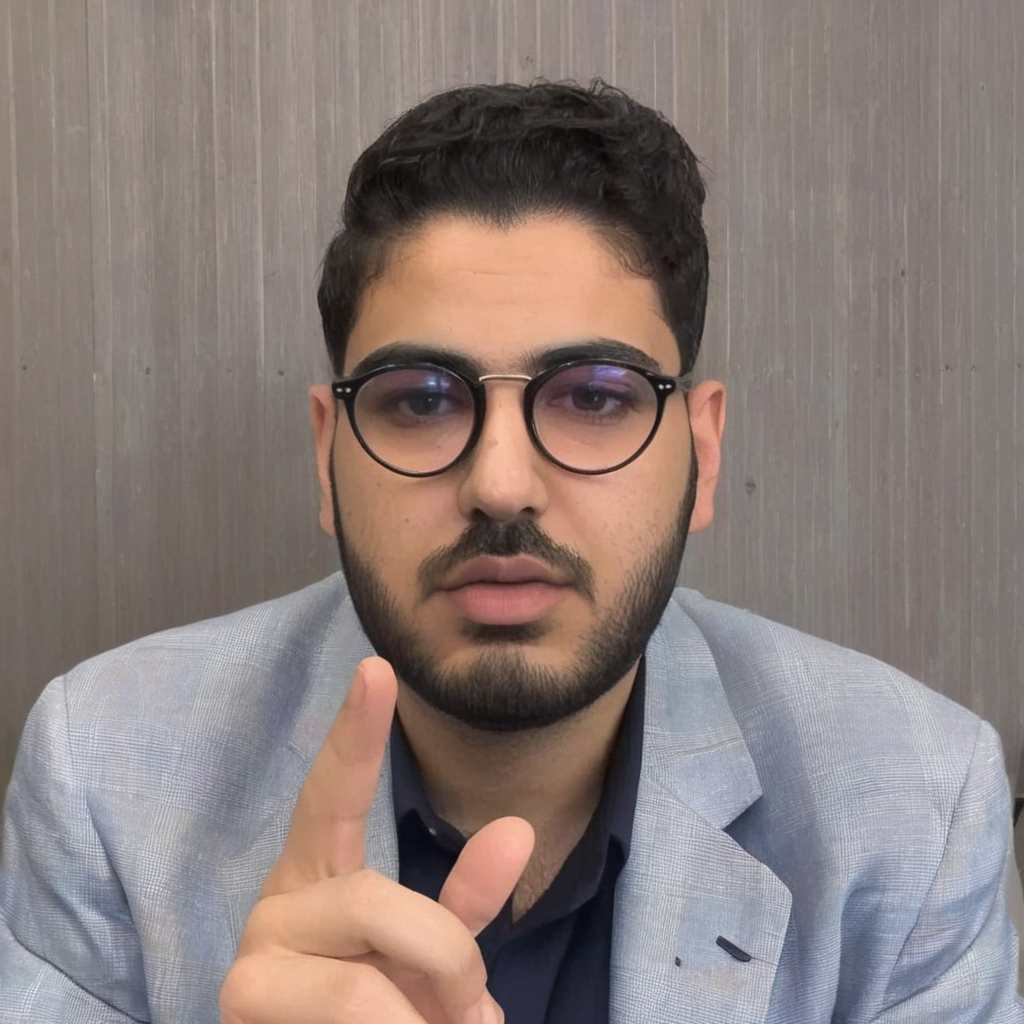

In [21]:
image = pipe("an image of ziyad hadine wearing a blue suit " ).images[0]
image